## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  66.833630  1058.005973  0.124645  2.496322  0.999217
1   4.777032  1639.372009  0.237359  4.398866  1.332447
2  69.435846   811.646670  0.385711  5.882638  1.293891
3  18.294940   379.093968  0.595449  5.031954  1.447396
4   6.536078  1125.222738  0.977133  7.379281  1.576657


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.92811 | train_mse: 3.24958 | train_mae: 1.44403 |  0:00:00s


epoch 1  | loss: 0.89943 | train_mse: 2.62735 | train_mae: 1.3042  |  0:00:00s
epoch 2  | loss: 0.89956 | train_mse: 1.62088 | train_mae: 1.02229 |  0:00:00s


epoch 3  | loss: 0.85928 | train_mse: 1.76431 | train_mae: 1.02697 |  0:00:00s
epoch 4  | loss: 0.60616 | train_mse: 2.28417 | train_mae: 1.21767 |  0:00:00s
epoch 5  | loss: 0.58848 | train_mse: 2.19431 | train_mae: 1.19651 |  0:00:00s


epoch 6  | loss: 0.90326 | train_mse: 1.56487 | train_mae: 1.00176 |  0:00:01s
epoch 7  | loss: 0.51009 | train_mse: 1.12068 | train_mae: 0.81268 |  0:00:01s
epoch 8  | loss: 0.58501 | train_mse: 0.87709 | train_mae: 0.7209  |  0:00:01s


epoch 9  | loss: 0.73688 | train_mse: 0.85582 | train_mae: 0.72364 |  0:00:01s
epoch 10 | loss: 0.65153 | train_mse: 0.81847 | train_mae: 0.67198 |  0:00:01s
epoch 11 | loss: 0.56036 | train_mse: 0.68215 | train_mae: 0.61325 |  0:00:01s


epoch 12 | loss: 0.55525 | train_mse: 0.65116 | train_mae: 0.58628 |  0:00:01s
epoch 13 | loss: 0.57639 | train_mse: 0.50596 | train_mae: 0.55029 |  0:00:01s
epoch 14 | loss: 0.52593 | train_mse: 0.42146 | train_mae: 0.51957 |  0:00:01s


epoch 15 | loss: 0.69379 | train_mse: 0.47131 | train_mae: 0.51954 |  0:00:01s
epoch 16 | loss: 0.44631 | train_mse: 0.54084 | train_mae: 0.55629 |  0:00:01s


epoch 17 | loss: 0.52669 | train_mse: 0.53891 | train_mae: 0.51455 |  0:00:02s
epoch 18 | loss: 0.58419 | train_mse: 0.56331 | train_mae: 0.52237 |  0:00:02s
epoch 19 | loss: 0.37355 | train_mse: 0.6351  | train_mae: 0.57233 |  0:00:02s


epoch 20 | loss: 0.35302 | train_mse: 0.84682 | train_mae: 0.66383 |  0:00:02s
epoch 21 | loss: 0.35649 | train_mse: 0.67615 | train_mae: 0.58618 |  0:00:02s


epoch 22 | loss: 0.41654 | train_mse: 0.57932 | train_mae: 0.55822 |  0:00:02s
epoch 23 | loss: 0.45526 | train_mse: 0.41712 | train_mae: 0.48345 |  0:00:02s
epoch 24 | loss: 0.33034 | train_mse: 0.43537 | train_mae: 0.49785 |  0:00:02s


epoch 25 | loss: 0.36488 | train_mse: 0.61692 | train_mae: 0.57507 |  0:00:03s
epoch 26 | loss: 0.38606 | train_mse: 0.64349 | train_mae: 0.57828 |  0:00:03s
epoch 27 | loss: 0.37587 | train_mse: 0.46749 | train_mae: 0.48981 |  0:00:03s


epoch 28 | loss: 0.27314 | train_mse: 0.43375 | train_mae: 0.48708 |  0:00:03s
epoch 29 | loss: 0.39761 | train_mse: 0.373   | train_mae: 0.46221 |  0:00:03s


epoch 30 | loss: 0.27837 | train_mse: 0.27713 | train_mae: 0.40356 |  0:00:03s


epoch 31 | loss: 0.22505 | train_mse: 0.3013  | train_mae: 0.40108 |  0:00:03s
epoch 32 | loss: 0.23433 | train_mse: 0.29082 | train_mae: 0.39177 |  0:00:04s


epoch 33 | loss: 0.2317  | train_mse: 0.24745 | train_mae: 0.37527 |  0:00:04s
epoch 34 | loss: 0.2104  | train_mse: 0.22597 | train_mae: 0.3701  |  0:00:04s


epoch 35 | loss: 0.19698 | train_mse: 0.21876 | train_mae: 0.36938 |  0:00:04s
epoch 36 | loss: 0.24165 | train_mse: 0.19747 | train_mae: 0.34883 |  0:00:04s


epoch 37 | loss: 0.19127 | train_mse: 0.20963 | train_mae: 0.3568  |  0:00:04s
epoch 38 | loss: 0.27449 | train_mse: 0.22109 | train_mae: 0.36515 |  0:00:04s


epoch 39 | loss: 0.20073 | train_mse: 0.27331 | train_mae: 0.38894 |  0:00:04s
epoch 40 | loss: 0.22777 | train_mse: 0.33938 | train_mae: 0.42353 |  0:00:05s


epoch 41 | loss: 0.20452 | train_mse: 0.24763 | train_mae: 0.37366 |  0:00:05s
epoch 42 | loss: 0.25494 | train_mse: 0.16696 | train_mae: 0.3118  |  0:00:05s


epoch 43 | loss: 0.31957 | train_mse: 0.16978 | train_mae: 0.31187 |  0:00:05s
epoch 44 | loss: 0.29212 | train_mse: 0.1787  | train_mae: 0.31132 |  0:00:05s


epoch 45 | loss: 0.26423 | train_mse: 0.19211 | train_mae: 0.33091 |  0:00:05s
epoch 46 | loss: 0.19962 | train_mse: 0.18413 | train_mae: 0.33625 |  0:00:05s


epoch 47 | loss: 0.33598 | train_mse: 0.17043 | train_mae: 0.33042 |  0:00:05s
epoch 48 | loss: 0.21643 | train_mse: 0.13385 | train_mae: 0.28856 |  0:00:06s


epoch 49 | loss: 0.27874 | train_mse: 0.13263 | train_mae: 0.28883 |  0:00:06s
epoch 50 | loss: 0.28457 | train_mse: 0.15419 | train_mae: 0.31678 |  0:00:06s
epoch 51 | loss: 0.30927 | train_mse: 0.16729 | train_mae: 0.32853 |  0:00:06s


epoch 52 | loss: 0.26592 | train_mse: 0.17719 | train_mae: 0.33055 |  0:00:06s
epoch 53 | loss: 0.21763 | train_mse: 0.19786 | train_mae: 0.33633 |  0:00:06s
epoch 54 | loss: 0.3375  | train_mse: 0.17563 | train_mae: 0.32207 |  0:00:06s


epoch 55 | loss: 0.30609 | train_mse: 0.16393 | train_mae: 0.30908 |  0:00:06s
epoch 56 | loss: 0.27358 | train_mse: 0.16362 | train_mae: 0.30959 |  0:00:06s
epoch 57 | loss: 0.27543 | train_mse: 0.16222 | train_mae: 0.31772 |  0:00:06s


epoch 58 | loss: 0.21839 | train_mse: 0.16063 | train_mae: 0.30937 |  0:00:06s
epoch 59 | loss: 0.26412 | train_mse: 0.15371 | train_mae: 0.30754 |  0:00:06s
epoch 60 | loss: 0.28707 | train_mse: 0.16786 | train_mae: 0.32108 |  0:00:07s


epoch 61 | loss: 0.22954 | train_mse: 0.17329 | train_mae: 0.31797 |  0:00:07s
epoch 62 | loss: 0.34956 | train_mse: 0.17569 | train_mae: 0.32147 |  0:00:07s


epoch 63 | loss: 0.21883 | train_mse: 0.17623 | train_mae: 0.32676 |  0:00:07s
epoch 64 | loss: 0.28906 | train_mse: 0.17589 | train_mae: 0.31927 |  0:00:07s
epoch 65 | loss: 0.44226 | train_mse: 0.15543 | train_mae: 0.29978 |  0:00:07s


epoch 66 | loss: 0.16571 | train_mse: 0.13266 | train_mae: 0.28942 |  0:00:07s
epoch 67 | loss: 0.18852 | train_mse: 0.13599 | train_mae: 0.29174 |  0:00:07s
epoch 68 | loss: 0.21083 | train_mse: 0.14392 | train_mae: 0.30264 |  0:00:07s


epoch 69 | loss: 0.1703  | train_mse: 0.1441  | train_mae: 0.29778 |  0:00:07s
epoch 70 | loss: 0.15504 | train_mse: 0.15421 | train_mae: 0.29863 |  0:00:07s
epoch 71 | loss: 0.29675 | train_mse: 0.14853 | train_mae: 0.29587 |  0:00:08s


epoch 72 | loss: 0.16618 | train_mse: 0.13198 | train_mae: 0.27897 |  0:00:08s
epoch 73 | loss: 0.26561 | train_mse: 0.13547 | train_mae: 0.27559 |  0:00:08s
epoch 74 | loss: 0.26375 | train_mse: 0.14716 | train_mae: 0.29158 |  0:00:08s


epoch 75 | loss: 0.24833 | train_mse: 0.14728 | train_mae: 0.29424 |  0:00:08s
epoch 76 | loss: 0.26106 | train_mse: 0.15947 | train_mae: 0.31149 |  0:00:08s
epoch 77 | loss: 0.31463 | train_mse: 0.14565 | train_mae: 0.2999  |  0:00:08s


epoch 78 | loss: 0.15209 | train_mse: 0.14544 | train_mae: 0.29451 |  0:00:08s
epoch 79 | loss: 0.33563 | train_mse: 0.13168 | train_mae: 0.28012 |  0:00:08s
epoch 80 | loss: 0.26755 | train_mse: 0.15639 | train_mae: 0.29559 |  0:00:08s


epoch 81 | loss: 0.2139  | train_mse: 0.1528  | train_mae: 0.29705 |  0:00:08s
epoch 82 | loss: 0.1832  | train_mse: 0.13773 | train_mae: 0.29401 |  0:00:08s
epoch 83 | loss: 0.30667 | train_mse: 0.12744 | train_mae: 0.2764  |  0:00:09s


epoch 84 | loss: 0.3151  | train_mse: 0.11838 | train_mae: 0.26407 |  0:00:09s
epoch 85 | loss: 0.20383 | train_mse: 0.10854 | train_mae: 0.25795 |  0:00:09s
epoch 86 | loss: 0.17157 | train_mse: 0.11879 | train_mae: 0.27199 |  0:00:09s


epoch 87 | loss: 0.37259 | train_mse: 0.14608 | train_mae: 0.29511 |  0:00:09s
epoch 88 | loss: 0.3001  | train_mse: 0.13835 | train_mae: 0.28806 |  0:00:09s
epoch 89 | loss: 0.2016  | train_mse: 0.13408 | train_mae: 0.28344 |  0:00:09s


epoch 90 | loss: 0.33969 | train_mse: 0.13139 | train_mae: 0.28175 |  0:00:09s
epoch 91 | loss: 0.18419 | train_mse: 0.11238 | train_mae: 0.26832 |  0:00:09s
epoch 92 | loss: 0.16559 | train_mse: 0.11806 | train_mae: 0.27714 |  0:00:09s


epoch 93 | loss: 0.27488 | train_mse: 0.12228 | train_mae: 0.28075 |  0:00:09s
epoch 94 | loss: 0.19572 | train_mse: 0.12629 | train_mae: 0.28485 |  0:00:09s
epoch 95 | loss: 0.17026 | train_mse: 0.12893 | train_mae: 0.28751 |  0:00:09s


epoch 96 | loss: 0.1787  | train_mse: 0.1248  | train_mae: 0.28799 |  0:00:10s
epoch 97 | loss: 0.23088 | train_mse: 0.11512 | train_mae: 0.27396 |  0:00:10s
epoch 98 | loss: 0.17263 | train_mse: 0.11697 | train_mae: 0.26799 |  0:00:10s


epoch 99 | loss: 0.4193  | train_mse: 0.12534 | train_mae: 0.29237 |  0:00:10s
epoch 100| loss: 0.26636 | train_mse: 0.13489 | train_mae: 0.29209 |  0:00:10s
epoch 101| loss: 0.18736 | train_mse: 0.13946 | train_mae: 0.29254 |  0:00:10s


epoch 102| loss: 0.16017 | train_mse: 0.13974 | train_mae: 0.29217 |  0:00:10s
epoch 103| loss: 0.31354 | train_mse: 0.13793 | train_mae: 0.28303 |  0:00:10s
epoch 104| loss: 0.15507 | train_mse: 0.147   | train_mae: 0.2981  |  0:00:10s


epoch 105| loss: 0.18463 | train_mse: 0.1488  | train_mae: 0.30501 |  0:00:10s
epoch 106| loss: 0.21986 | train_mse: 0.13591 | train_mae: 0.2918  |  0:00:10s
epoch 107| loss: 0.26014 | train_mse: 0.12515 | train_mae: 0.27692 |  0:00:10s


epoch 108| loss: 0.17913 | train_mse: 0.13126 | train_mae: 0.28656 |  0:00:10s
epoch 109| loss: 0.30049 | train_mse: 0.17994 | train_mae: 0.32797 |  0:00:11s


epoch 110| loss: 0.22405 | train_mse: 0.19228 | train_mae: 0.33816 |  0:00:11s
epoch 111| loss: 0.28175 | train_mse: 0.17454 | train_mae: 0.32881 |  0:00:11s


epoch 112| loss: 0.28015 | train_mse: 0.1808  | train_mae: 0.32444 |  0:00:11s
epoch 113| loss: 0.18734 | train_mse: 0.16407 | train_mae: 0.30592 |  0:00:11s
epoch 114| loss: 0.21739 | train_mse: 0.13381 | train_mae: 0.27405 |  0:00:11s


epoch 115| loss: 0.19235 | train_mse: 0.15137 | train_mae: 0.29289 |  0:00:11s
epoch 116| loss: 0.19747 | train_mse: 0.17587 | train_mae: 0.31692 |  0:00:11s
epoch 117| loss: 0.14462 | train_mse: 0.17724 | train_mae: 0.3193  |  0:00:11s


epoch 118| loss: 0.23611 | train_mse: 0.18544 | train_mae: 0.3252  |  0:00:12s
epoch 119| loss: 0.23488 | train_mse: 0.17122 | train_mae: 0.31221 |  0:00:12s
epoch 120| loss: 0.16761 | train_mse: 0.15643 | train_mae: 0.3041  |  0:00:12s


epoch 121| loss: 0.31638 | train_mse: 0.14965 | train_mae: 0.29353 |  0:00:12s
epoch 122| loss: 0.25375 | train_mse: 0.14534 | train_mae: 0.29593 |  0:00:12s
epoch 123| loss: 0.2371  | train_mse: 0.12335 | train_mae: 0.2846  |  0:00:12s


epoch 124| loss: 0.28132 | train_mse: 0.12887 | train_mae: 0.28715 |  0:00:12s
epoch 125| loss: 0.20007 | train_mse: 0.16386 | train_mae: 0.30425 |  0:00:12s
epoch 126| loss: 0.16533 | train_mse: 0.19975 | train_mae: 0.34028 |  0:00:12s


epoch 127| loss: 0.1622  | train_mse: 0.22079 | train_mae: 0.35756 |  0:00:12s
epoch 128| loss: 0.14631 | train_mse: 0.19397 | train_mae: 0.32568 |  0:00:12s
epoch 129| loss: 0.21167 | train_mse: 0.15495 | train_mae: 0.29529 |  0:00:13s


epoch 130| loss: 0.14729 | train_mse: 0.12724 | train_mae: 0.27474 |  0:00:13s
epoch 131| loss: 0.21541 | train_mse: 0.11344 | train_mae: 0.26952 |  0:00:13s
epoch 132| loss: 0.19389 | train_mse: 0.12047 | train_mae: 0.27918 |  0:00:13s


epoch 133| loss: 0.18968 | train_mse: 0.14319 | train_mae: 0.2971  |  0:00:13s
epoch 134| loss: 0.18905 | train_mse: 0.15803 | train_mae: 0.31931 |  0:00:13s
epoch 135| loss: 0.29084 | train_mse: 0.16047 | train_mae: 0.32221 |  0:00:13s

Early stopping occurred at epoch 135 with best_epoch = 85 and best_train_mae = 0.25795
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

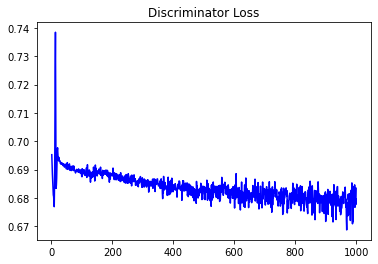

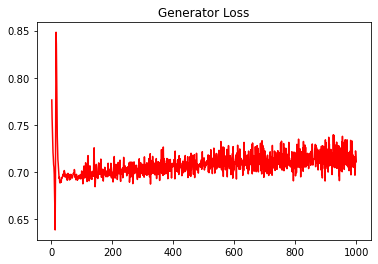

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.5947533204709907


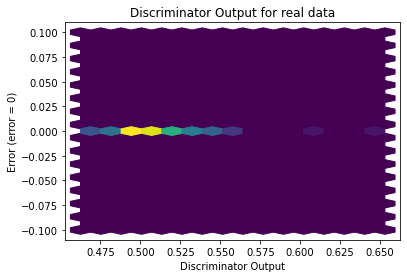

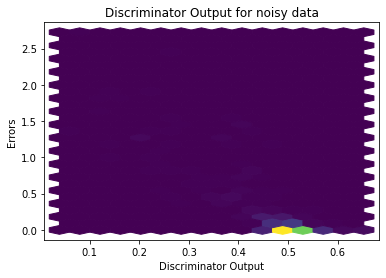

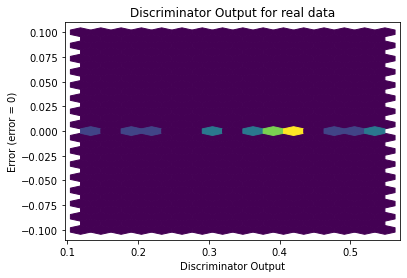

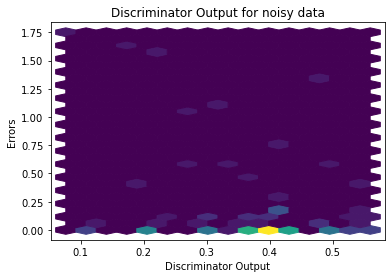

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


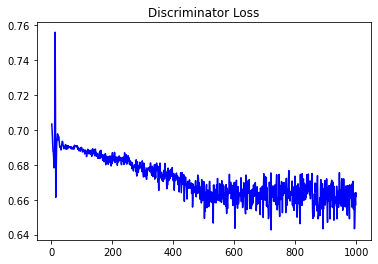

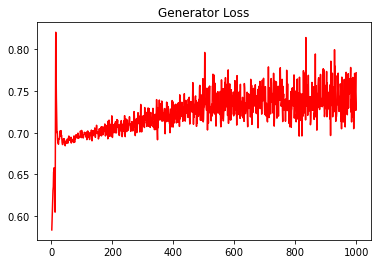

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.5227804056896801


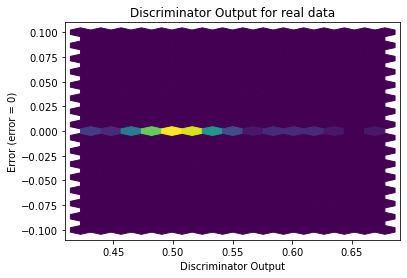

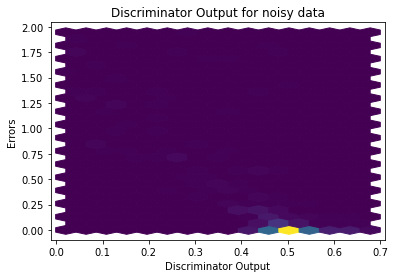

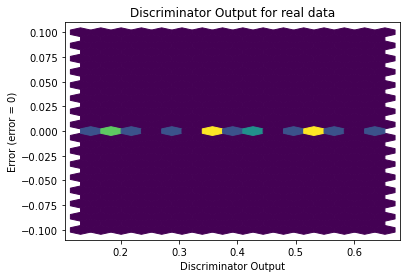

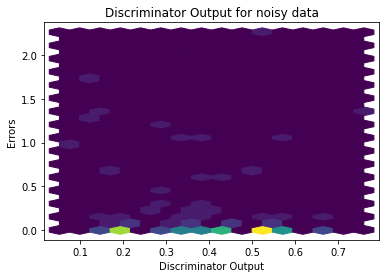

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4596]], requires_grad=True)
